In [1]:
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
def midpoint(ptA,ptB):
    return ((ptA[0] + ptB[0]) * 0.5 , (ptA[1] + ptB[1]) * 0.5)

In [3]:
def get_shrimp_data(real_len,pix_num,file_path):
    
    img = cv2.imread(file_path)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray,127,255,0)
    contours,hierarchy = cv2.findContours(thresh, 1, 2)


    cv_contours = []
    
    # Remove interference

    for contour in contours:
        area = cv2.contourArea(contour)
        cv_contours.append(contour)
        
    cnt = cv_contours[0]

    rect = cv2.minAreaRect(cnt)
    # cv2.boxPoints(rect) for OpenCV
    box = cv2.boxPoints(rect) 
    box = np.int0(box)
    (tl,tr,br,bl) = box 
    
    img_copy = cv2.drawContours(img,[box],0,(0,0,255),2)

    m1 = (x1,y1) = midpoint(tl,tr)
    m2 = (x2,y2) = midpoint(tl,bl)
    m3 = (x3,y3) = midpoint(bl,br)
    m4 = (x4,y4) = midpoint(tr,br)    

    md = [(int(x1),int(y1)),(int(x2),int(y2)),(int(x3),int(y3)),(int(x4),int(y4))]

    # get distances between midpoints
    
    dA = dist.euclidean(m1,m3)
    dB = dist.euclidean(m2,m4)

    # get lenth, width

    if dA > dB:
        pix_L = dA
        pix_W = dB
    else:
        pix_L = dB
        pix_W = dA

    # calculate real lenth by pixels
    
    '''
    e.g:
    real_len = 25
    pix_num = 108

    we get teh pix_thresh as 0.2314
    '''
    pix_thresh = real_len/pix_num

    lenth = pix_L*pix_thresh
    width = pix_W*pix_thresh

    print("Lenth(mm):",lenth)
    print("Width(mm):",width)

    return lenth,width


In [4]:
sourceDir = ('cropped_image_2') # Note that you need to get the binarized image from the Yolo recognition result first

img_list = sorted((os.listdir(sourceDir)),key=len)

real_len = 310
pix_num = 2100

len_list = []
width_list = []

counter = 0


for i in img_list:
   lenth,width = get_shrimp_data(real_len,pix_num,os.path.join(sourceDir, i))

   len_list = np.append(len_list, lenth)
   width_list = np.append(width_list, width)

# calculate avg lenth & width

avg_lenth = np.mean(len_list)
avg_width = np.mean(width_list)

print("avg lenth in this set(mm):",avg_lenth)
print("avg width in this set(mm):",avg_width)


Lenth(mm): 13.122743840207033
Width(mm): 2.3549749530469444
Lenth(mm): 16.07929930728177
Width(mm): 3.1746676580752555
Lenth(mm): 14.662109101717174
Width(mm): 3.0045100264213156
Lenth(mm): 14.2597631351717
Width(mm): 2.8747838329460187
Lenth(mm): 0.7380952380952381
Width(mm): 0.29523809523809524
Lenth(mm): 14.966052666829148
Width(mm): 2.8490858620675343
Lenth(mm): 14.86084698940913
Width(mm): 2.683663942112539
Lenth(mm): 14.294105670383852
Width(mm): 2.244829029038629
Lenth(mm): 14.92668743333317
Width(mm): 2.9468400386094813
Lenth(mm): 13.896982902301064
Width(mm): 2.7399145094828006
Lenth(mm): 15.521951575933473
Width(mm): 2.8709912404860876
Lenth(mm): 12.148787534102027
Width(mm): 2.5268310753682592
Lenth(mm): 11.977400535290052
Width(mm): 2.794058524538946
Lenth(mm): 11.979901914732913
Width(mm): 2.51386179687485
Lenth(mm): 1.6238095238095238
Width(mm): 0.29523809523809524
Lenth(mm): 12.6093370094781
Width(mm): 2.9972483601507407
Lenth(mm): 14.466666666666667
Width(mm): 2.5095238

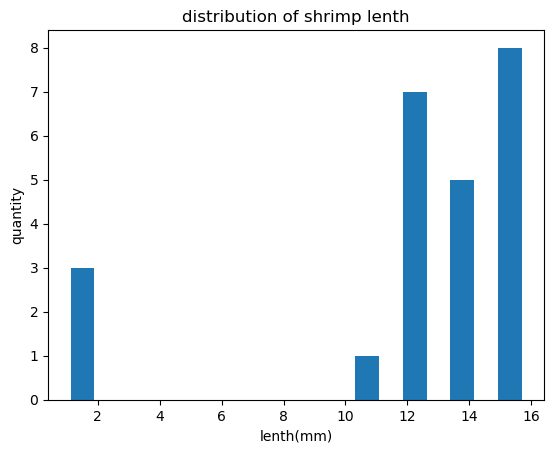

In [5]:
plt.hist(len_list, bins=10, rwidth=0.5)

plt.xlabel('lenth(mm)')
plt.ylabel('quantity')
plt.title('distribution of shrimp lenth')
plt.show()

In [6]:
#Remove oversized or undersized noise

len_list_fixed = result = len_list[(len_list > 10) & (len_list <= 20)]

avg_lenth_fixed = np.mean(len_list_fixed)

print("avg lenth fixed in this set(mm):",avg_lenth_fixed)

avg lenth fixed in this set(mm): 13.700484587284743


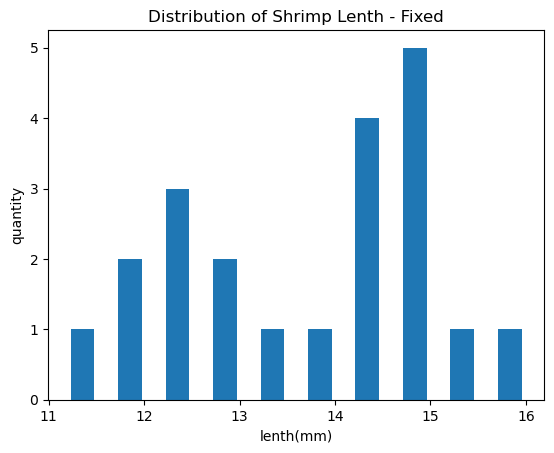

In [7]:
plt.hist(len_list_fixed, bins=10, rwidth=0.5)

plt.xlabel('lenth(mm)')
plt.ylabel('quantity')
plt.title('Distribution of Shrimp Lenth - Fixed')
plt.show()

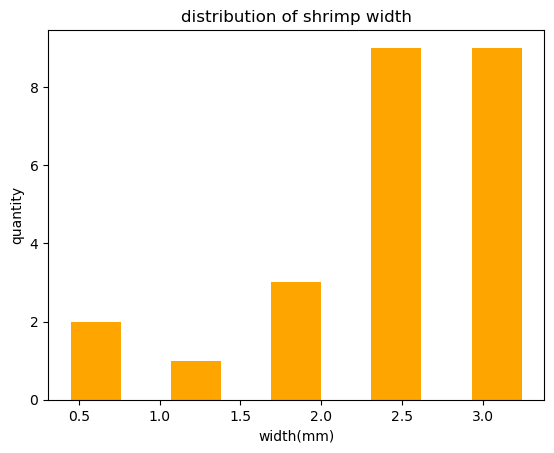

In [8]:
plt.hist(width_list, bins=5, rwidth=0.5,color="orange")

plt.xlabel('width(mm)')
plt.ylabel('quantity')
plt.title('distribution of shrimp width')
plt.show()